In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import torch
import os
from rdkit import Chem
from rdkit.Geometry import Point3D

In [3]:
from utils_eval import build_pdb_dict, center2zero, pp_match
from pp_matching_specific_site import compute_center

In [4]:
import py3Dmol
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, Image
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 600, 600

In [5]:
# ligand_name = '1ywn_A_rec_1ywn_lif_lig_tt_docked_0'
# ligand_name = '4b81_B_rec_4ara_c56_lig_tt_min_0'
# ligand_name = '1lhu_A_rec_1lhn_aon_lig_tt_min_0'
# ligand_name = '4b84_A_rec_4b84_z5k_lig_tt_min_0'
# ligand_name = '3fu5_A_rec_5ni6_dj3_lig_tt_min_0'
# ligand_name = '5hbh_A_rec_5idn_6a7_lig_tt_min_0'
# ligand_name = '5aen_A_rec_5ni2_dj3_lig_tt_min_0'
# ligand_name = '3d3e_B_rec_4ijw_1eq_lig_tt_min_0'
# ligand_name = '4yyz_B_rec_3ey4_352_lig_tt_docked_12'
# ligand_name = '4h7c_A_rec_3r58_nps_lig_tt_min_0'
# ligand_name = '3ey4_C_rec_4k1l_sff_lig_tt_min_0'

# ligand_name = '3hfg_A_rec_3hfg_17r_lig_tt_min_0'
# ligand_name = '3ey4_C_rec_5pgu_8k4_lig_tt_min_0'  # 0.11 0.10
# ligand_name = '5ni2_A_rec_5aen_dp8_lig_tt_min_0'
# ligand_name = '3fu5_A_rec_5ni6_dj3_lig_tt_min_0'
# ligand_name = '4yyz_B_rec_2ilt_nn1_lig_tt_min_0'  # 0.16 0.20 
# ligand_name = '4bnn_A_rec_4bnm_tcu_lig_tt_min_0'
# ligand_name = '4yvx_A_rec_1s2a_imn_lig_tt_min_0'
# ligand_name = '3czr_B_rec_4bb5_hd2_lig_tt_min_0'
# ligand_name = '3czr_A_rec_2ilt_nn1_lig_tt_min_0'
# ligand_name = '4b84_A_rec_4btl_5gz_lig_tt_min_0'
# ligand_name = '3fue_A_rec_3ftv_11x_lig_tt_min_0'  # 0.04 0.05
# ligand_name = '4bnk_B_rec_4d44_ja3_lig_tt_min_0'  # 0.26 0.27
# ligand_name = '3qqp_B_rec_4k1l_sff_lig_tt_min_0'
# ligand_name = '4wdu_A_rec_3r94_flr_lig_tt_min_0'  # 0.37 0.27
# ligand_name = '4alj_A_rec_4bnf_pv4_lig_tt_docked_0'  # 0.24 0.24
# ligand_name = '1ejj_A_rec_1o99_2pg_lig_tt_docked_0'
# ligand_name = '4h96_B_rec_4h95_06u_lig_tt_min_0'  # 0.40 0.42
# ligand_name = '2oa6_D_rec_4kvi_1sv_lig_tt_min_0'  # 0.36 0.41
# ligand_name = '4hx5_B_rec_3bzu_a21_lig_tt_min_0'
# ligand_name = '5pgy_D_rec_3bzu_a21_lig_tt_min_0'
# ligand_name = '5pgv_A_rec_3bzu_a21_lig_tt_min_0'
# ligand_name = '4kux_B_rec_4kvw_jf4_lig_tt_min_0'  # 0.61 0.63
# ligand_name = '4bnk_B_rec_4bnl_w1g_lig_tt_min_0'
# ligand_name = '4b82_B_rec_4ara_c56_lig_tt_min_0'  # 0.42 0.53
# ligand_name = '4pm0_A_rec_4y2b_epk_lig_tt_min_0'
# ligand_name = '4ms6_A_rec_3fuh_5h1_lig_tt_min_0'  # 0.02 0.02
# ligand_name = '5ivg_B_rec_4kvy_jf1_lig_tt_docked_9'  # 0.61 0.69
# ligand_name = '3r8h_A_rec_3r8h_zom_lig_tt_min_0'
# ligand_name = '1aoe_A_rec_3qlr_qlr_lig_tt_docked_4'  # 0.19 0.28
# ligand_name = '2ilt_A_rec_3ey4_352_lig_tt_min_0'  # 0.70 0.71
# ligand_name = '2g1q_A_rec_1x88_nat_lig_tt_min_0'  # 0.59 0.59
# ligand_name = '5imp_B_rec_4kwd_jf2_lig_tt_min_0'  # 0.54 0.55
# ligand_name = '4d45_A_rec_4ali_tcl_lig_tt_min_0'  # 0.57 0.52
# ligand_name = '5ivg_B_rec_4kvw_jf4_lig_tt_min_0'
# ligand_name = '2rbe_C_rec_3byz_h11_lig_tt_min_0'
# ligand_name = '2whr_A_rec_3zlv_hi6_lig_tt_min_0'
# ligand_name = '4hmn_A_rec_3ufy_npx_lig_tt_min_0'
# ligand_name = '4h7c_A_rec_3r6i_jms_lig_tt_min_0'
# ligand_name = '1pha_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1phd_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1phg_A_rec_1phe_piy_lig_tt_min_0'
# ligand_name = '1phg_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1p2y_A_rec_1phg_myt_lig_tt_min_0'
# ligand_name = '1p2y_A_rec_1phe_piy_lig_tt_min_0'
# ligand_name = '5lgq_D_rec_4ikp_4ik_lig_tt_docked_1'
# ligand_name = '1c8j_A_rec_1p2y_nct_lig_tt_min_0'
# ligand_name = '1l5l_A_rec_1l4l_xyd_lig_tt_min_0'
# ligand_name = '4l0s_A_rec_5al5_jl9_lig_tt_min_0'
# ligand_name = '2pg2_A_rec_2wog_zzd_lig_tt_min_0'
# ligand_name = '4yur_A_rec_3cok_anp_lig_tt_min_0'
# ligand_name = '3ny8_A_rec_4ldo_ale_lig_tt_docked_4'  # remove atom 11

# ligand_name = '4mrg_A_rec_5bzf_4x3_lig_tt_docked_2'
# ligand_name = '1k4h_A_rec_1p0b_pq0_lig_tt_docked_0'

# ligand_name = '3nbq_B_rec_3nbq_urf_lig_tt_docked_2'
# ligand_name = '3p1c_B_rec_3p1f_3pf_lig_tt_min_0'
# ligand_name = '5swg_A_rec_5swt_71a_lig_tt_min_0'
# ligand_name = '3euf_A_rec_3nbq_urf_lig_tt_min_0'
# ligand_name = '2vce_A_rec_2vce_tc7_lig_tt_docked_0'
# ligand_name = '4xud_A_rec_5lsa_dnc_lig_tt_docked_2'
# ligand_name = '1eoc_A_rec_2buz_4nc_lig_tt_docked_4'
# ligand_name = '1y5x_A_rec_4puk_2wu_lig_tt_min_0'
# ligand_name = '2bur_A_rec_1eoc_4nc_lig_tt_min_0'
# ligand_name = '1k4h_A_rec_1p0b_pq0_lig_tt_docked_0'
# ligand_name = '1eob_A_rec_2buz_4nc_lig_tt_min_0'
# ligand_name = '4mrg_A_rec_5bzf_4x3_lig_tt_docked_2'
# ligand_name = '4xuc_A_rec_5lsa_dnc_lig_tt_min_0'
# ligand_name = '1kwc_B_rec_1eir_bpy_lig_tt_min_0'
# ligand_name = '2vce_A_rec_2vce_tc7_lig_tt_min_0'
# ligand_name = '1eoc_A_rec_1eoc_4nc_lig_tt_min_0'
# ligand_name = '5mpz_A_rec_5mqg_f31_lig_tt_docked_3'
# ligand_name = '2buq_A_rec_2buz_4nc_lig_tt_min_0'
# ligand_name = '4mrf_A_rec_4mre_2c9_lig_tt_min_0'
# ligand_name = '1k9s_D_rec_1a69_fmb_lig_tt_min_0'
# ligand_name = '5i00_A_rec_1enu_apz_lig_tt_min_0'
# ligand_name = '1eoc_A_rec_2buz_4nc_lig_tt_min_0'
# ligand_name = '2bur_A_rec_2buz_4nc_lig_tt_min_0'
# ligand_name = '3eue_A_rec_3nbq_urf_lig_tt_min_0'
# ligand_name = '4xue_B_rec_5lsa_dnc_lig_tt_docked_10'
# ligand_name = '5jxq_A_rec_1p0b_pq0_lig_tt_min_0'
# ligand_name = '1eob_A_rec_2buu_4nc_lig_tt_min_0'
# ligand_name = '3rr4_A_rec_1p0b_pq0_lig_tt_min_0'
# ligand_name = '2vch_A_rec_2vce_tc7_lig_tt_min_0'
# ligand_name = '2buu_A_rec_1eoc_4nc_lig_tt_min_0'
# ligand_name = '4xuc_A_rec_5lsa_dnc_lig_tt_docked_7'

# ligand_name = '5ehq_A_rec_1j06_ae3_lig_tt_min_0'

ligand_name = '2xud_A_rec_4a23_c56_lig_tt_min_0'

# folder_name = ligand_name[ligand_name.rfind('rec')+4:ligand_name.rfind('rec')+8]
folder_name = ligand_name

In [6]:
raw_data_path = '../../data/cleaned_crossdocked_data/raw'
pdb_dict, pdb_rev_dict = build_pdb_dict(raw_data_path)

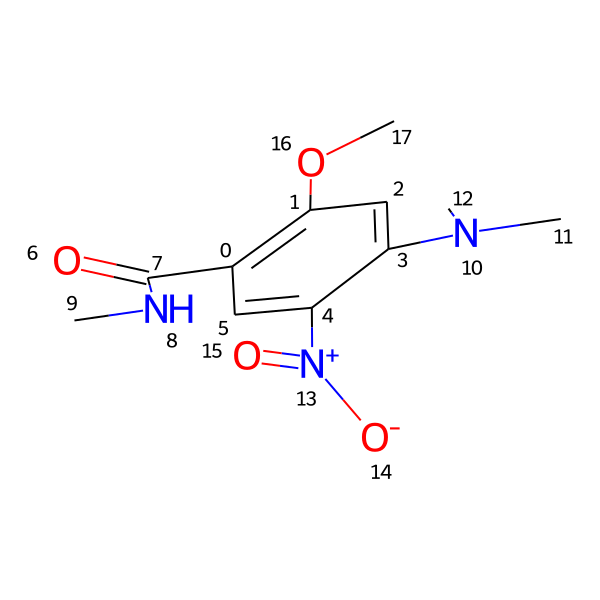

In [7]:
pdb_folder = pdb_rev_dict[ligand_name+'.sdf']
ref_file = os.path.join(raw_data_path, pdb_folder, ligand_name+'.sdf')
ref_m = Chem.MolFromMolFile(ref_file)
ref_m

In [8]:
ref_m.GetNumConformers()

1

In [9]:
conf = ref_m.GetConformer()
atom_positions = conf.GetPositions()

atom_positions

array([[31.2043, 22.2008,  9.7337],
       [32.3091, 23.0013, 10.0996],
       [33.3947, 23.1169,  9.2188],
       [33.4181, 22.4481,  7.9888],
       [32.3315, 21.6155,  7.6378],
       [31.2398, 21.5174,  8.5103],
       [28.8623, 22.289 , 10.1231],
       [30.0059, 22.0372, 10.5946],
       [30.1247, 21.602 , 11.9513],
       [28.9673, 21.4353, 12.8142],
       [34.5169, 22.6776,  7.0938],
       [35.8598, 22.8742,  7.6148],
       [34.2686, 23.0211,  5.7028],
       [32.3374, 20.8238,  6.4385],
       [33.2259, 19.7831,  6.2948],
       [31.4138, 20.9438,  5.6067],
       [32.3218, 23.6798, 11.3245],
       [33.4964, 24.2601, 11.8763]])

In [10]:
# th_data = 'pharmacophore_specific_eval/3r58/4h7c_A_rec_3r58_nps_lig_tt_min_0.pt'
# th_data = os.path.join('pharmacophore_specific_eval', folder_name, ligand_name+'.pt')
th_data = os.path.join('structure_based', folder_name, ligand_name+'_aromatic.pt')
# th_data = os.path.join('ligand_based', folder_name, ligand_name+'_aromatic.pt')
data = torch.load(th_data)
data.target_pos

tensor([[32.3162, 22.3167,  8.8648],
        [32.3162, 22.3167,  8.8648],
        [32.3162, 22.3167,  8.8648],
        [32.3162, 22.3167,  8.8648],
        [32.3162, 22.3167,  8.8648],
        [32.3162, 22.3167,  8.8648],
        [28.8623, 22.2890, 10.1231],
        [30.8232, 22.5775, 11.7617],
        [30.1247, 21.6020, 11.9513],
        [30.8232, 22.5775, 11.7617],
        [34.8818, 22.8576,  6.8038],
        [34.8818, 22.8576,  6.8038],
        [34.8818, 22.8576,  6.8038],
        [32.3374, 20.8238,  6.4385],
        [33.2259, 19.7831,  6.2948],
        [31.4138, 20.9438,  5.6067],
        [32.3218, 23.6798, 11.3245],
        [30.8232, 22.5775, 11.7617],
        [32.3162, 22.3167,  8.8648],
        [32.3162, 22.3167,  8.8648],
        [32.3162, 22.3167,  8.8648],
        [32.3162, 22.3167,  8.8648],
        [32.3162, 22.3167,  8.8648],
        [32.3162, 22.3167,  8.8648],
        [28.8623, 22.2890, 10.1231],
        [30.8232, 22.5775, 11.7617],
        [30.1247, 21.6020, 11.9513],
 

In [11]:
center = compute_center(data['target_pos'], data['Gt_mask']).numpy()
center

array([32.18324 , 22.184834,  8.923578], dtype=float32)

In [12]:
for i in range(ref_m.GetNumAtoms()):
    x,y,z = atom_positions[i] - center
    print(x, y, z)
    conf.SetAtomPosition(i,Point3D(x,y,z))

-0.978938983154297 0.015966473388672853 0.8101217376708991
0.12586101684570394 0.8164664733886724 1.176021737670899
1.2114610168457034 0.932066473388673 0.2952217376708983
1.2348610168457057 0.26326647338867204 -0.9347782623291012
0.14826101684570148 -0.5693335266113273 -1.2857782623291012
-0.943438983154298 -0.6674335266113296 -0.4132782623291007
-3.3209389831542957 0.10416647338867335 1.1995217376708993
-2.1773389831542964 -0.14763352661132956 1.6710217376708982
-2.058538983154296 -0.5828335266113278 3.0277217376708982
-3.2159389831542953 -0.7495335266113266 3.890621737670898
2.333661016845703 0.49276647338867363 -1.8297782623291017
3.676561016845703 0.6893664733886702 -1.3087782623291018
2.0853610168457024 0.8362664733886724 -3.2207782623291017
0.1541610168457055 -1.3610335266113296 -2.4850782623291012
1.042661016845706 -2.401733526611327 -2.628778262329101
-0.7694389831542985 -1.2410335266113286 -3.3168782623291015
0.13856101684570632 1.494966473388672 2.400921737670899
1.313161016

In [13]:
# ref_m.AddConformer(conf)
for conformer in ref_m.GetConformers():
    print(conformer.GetPositions())

[[-0.97893898  0.01596647  0.81012174]
 [ 0.12586102  0.81646647  1.17602174]
 [ 1.21146102  0.93206647  0.29522174]
 [ 1.23486102  0.26326647 -0.93477826]
 [ 0.14826102 -0.56933353 -1.28577826]
 [-0.94343898 -0.66743353 -0.41327826]
 [-3.32093898  0.10416647  1.19952174]
 [-2.17733898 -0.14763353  1.67102174]
 [-2.05853898 -0.58283353  3.02772174]
 [-3.21593898 -0.74953353  3.89062174]
 [ 2.33366102  0.49276647 -1.82977826]
 [ 3.67656102  0.68936647 -1.30877826]
 [ 2.08536102  0.83626647 -3.22077826]
 [ 0.15416102 -1.36103353 -2.48507826]
 [ 1.04266102 -2.40173353 -2.62877826]
 [-0.76943898 -1.24103353 -3.31687826]
 [ 0.13856102  1.49496647  2.40092174]
 [ 1.31316102  2.07526647  2.95272174]]


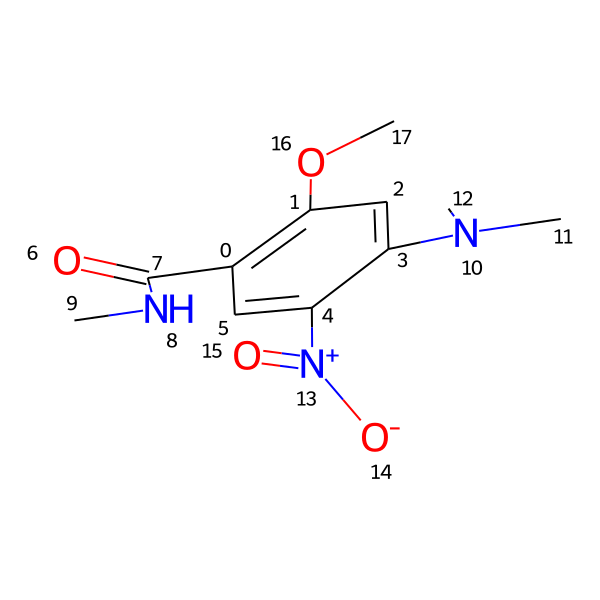

In [14]:
ref_m

In [15]:
# # Convert to an editable molecule
# editable_mol = Chem.RWMol(ref_m)

# # Remove the first atom (atom index 0, which corresponds to the first carbon)
# editable_mol.RemoveAtom(11)
# editable_mol.RemoveAtom(8)

# # Convert back to a normal molecule
# new_m = editable_mol.GetMol()

# # Optionally sanitize the molecule
# Chem.SanitizeMol(new_m)
# new_m

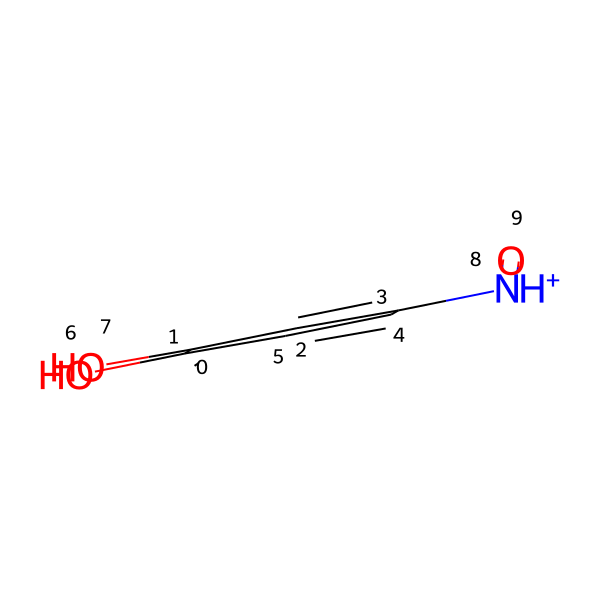

In [65]:
# # Convert to an editable molecule
# editable_mol = Chem.RWMol(ref_m)

# # Remove the first atom (atom index 0, which corresponds to the first carbon)
# editable_mol.RemoveAtom(10)

# # Convert back to a normal molecule
# new_m = editable_mol.GetMol()

# # Optionally sanitize the molecule
# Chem.SanitizeMol(new_m)
# new_m

In [66]:
# new_m.GetNumConformers()

In [16]:
with Chem.SDWriter(os.path.join('structure_based', folder_name, ligand_name+'.sdf')) as w:
    w.write(ref_m)

# with Chem.SDWriter(os.path.join('structure_based', folder_name, ligand_name+'.sdf')) as w:
#     w.write(new_m)

# with Chem.SDWriter(os.path.join('ligand_based', folder_name, ligand_name+'.sdf')) as w:
#     w.write(ref_m)

# with Chem.SDWriter(os.path.join('ligand_based', folder_name, ligand_name+'.sdf')) as w:
#     w.write(new_m)